In [10]:
using Pkg, DifferentialEquations, PenaltyFunctions, Optim, StatsBase, Plots, CSV, DataFrames, DiffEqParamEstim;

## Single Population Growth

In [15]:
# exponential growth of a single population
function singleExpGrowth(du,u,p,t)
    du[1] = p[1].*u[1]
end

singleExpGrowth (generic function with 1 method)

In [16]:
# logistic growth of a single population with carrying capacity
function singleLogGrwoth(du,u,p,t)
    du[1] = p[1].*u[1].*((p[2]-u[1])./p[2])
end

singleLogGrwoth (generic function with 1 method)

In [17]:
# set initial conditions
param = [0.01]
u0 = [0.1];
tspan = (0.0, 72.0);

# define ODE problem & solve
prob = ODEProblem(singleExpGrowth,u0,tspan,param);
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 6-element Vector{Float64}:
  0.0
  0.25168902290140654
  2.7685792519154715
 18.94919229513901
 47.97067293253077
 72.0
u: 6-element Vector{Vector{Float64}}:
 [0.1]
 [0.10025200602562055]
 [0.10280726055636757]
 [0.12086353619382235]
 [0.16156005128576417]
 [0.2054433194086689]

In [30]:
sol(6)[1]

0.1061836555281568

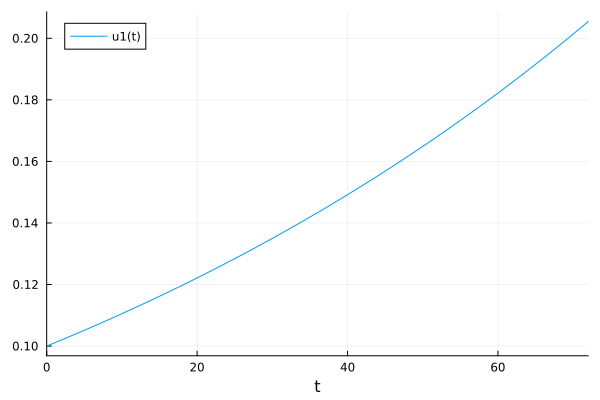

In [18]:
plot(sol)

## Setting Up Parameter Estimation

In [19]:
function calcAICscore(RSS,n,k)
    AIC = 2.0*(k+1)+n+log(RSS/n)+n*(1+log(2*pi))
end

calcAICscore (generic function with 1 method)

In [23]:
source = "/Users/ferrallm/GitHub/PanCan-PopDynamics/data/LM3-700-NAV_DMSOonly.csv"
datatable = CSV.read(source, DataFrame);
data = Matrix(datatable);

In [27]:
data[1,(2:end)]

5-element Vector{Float64}:
  8839.554
 11957.118
 15204.672
 18868.122
 23713.938

In [ ]:
# function to calculate the loss: loss(solve(diffeq), data)
function my_loss_func(sol)
    tot_loss = 0.0
    if any((s.retcode != :Success for s in sol.u))
      tot_loss = Inf
    else
        # calculation for the loss here
        for i in 1:length(sol.u)
            solI = sol.u[i]
            x = data[i,(2:end)]
            y = [sol(6)[1],sol(12)[1],sol(18)[1],sol(24)[1],sol(30)[1]]
            tot_loss += sum((abs(x .- y).^2)./((x).^2))
        end
    end
    tot_loss
end